In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import time
import pickle as pkl

import numpy as np
import scipy
import scipy.sparse
import scipy.sparse.linalg
# from sympy import *
# from sympy.vector import laplacian

C:\Users\ghost\Anaconda3\pkgs\python-3.6.0-0\Lib\importlib\_bootstrap.py:205: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [98]:
x, E = symbols('x E')
psi = symbols('psi', cls=Function)
schr = Eq(-psi(x).diff(x, x) - Float(1.0)/x * psi(x), E * psi(x))
classify_ode(schr, psi(x))
# dsolve(schr, psi(x))  # , ics={psi(0): 0, psi(1): 1}
# solve(-psi(x).diff(x, x) + Float(1.0)/x * psi(x) - E * psi(x), psi(x), ics={psi(0): 0, psi(1): 1})

()

In [201]:
from scipy.integrate import ode, odeint
from scipy.optimize import brentq

===== -619.6578420992868 (-3.786373278502615e+23-3.786373278502615e+23j)
===== -276.1914486581431 (-9413511003.833849-9413511003.833849j)
===== -155.5797488201917 (19403.496922371487+19403.496922371487j)
===== -99.65655337074172 (14.997859540049028+14.997859540049028j)
===== -69.24553242341103 (-0.00017482872201501955-0.00017482872201501955j)


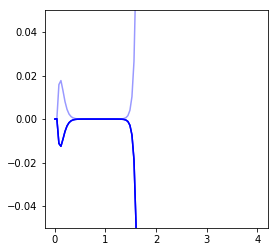

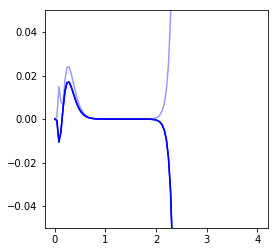

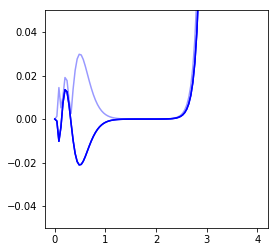

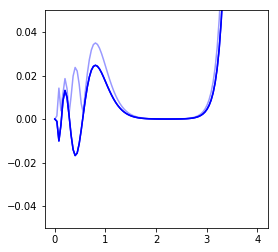

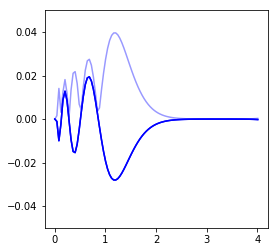

In [203]:
def schr(t, y, E):
  psi, dpsi = y
  dydt = [dpsi, -E * psi - 100.0 / np.absolute(t) * psi]
  return dydt

y0 = np.array([0.00001 + 0.00001j, 1.0 + 1.0j], dtype=np.complex128)
# y0 = np.array([1.0 + 1.0j, -1.0 - 1.0j], dtype=np.complex128)
t = np.array(np.linspace(0.0001, 4.01, 101))

def solve_schr(E):
  solver = ode(schr).set_integrator('zvode', method='bdf')
  solver.set_initial_value(y0, t[0]).set_f_params(E)
#   ts = [t[0]]
  ys = [y0[0]]
  t1 = t[-1]
  dt = (t1 - t[0]) / (t.shape[0]-1)
  i = 1
  while solver.successful() and solver.t < t1:
#     ts.append(solver.t+dt)
    ys.append(solver.integrate(solver.t+dt)[0])
#   print(ys)
#   print(ts)
  sol = np.array(ys)
  return sol

def eval_E(E):
#   sol = odeint(schr, y0, t, args=(E,))
  sol = solve_schr(E)
#   return sol[-20:][np.argmax(np.power(sol[-20:], 2.0))]
  return np.mean(sol[-3:])

# fig, ax = plt.subplots(10, figsize=(3, 20))
best_E = None
best_err = 1e10
last_E = 0.0
last_err = 0.0
for i, E in enumerate(np.linspace(-1000.0, -60.0, 500)):
  err = eval_E(E)
#   print(E, err)
  # There's a node in-between
  if np.sign(err) * np.sign(last_err) < 0:
    valid_E = brentq(eval_E, last_E, E)  # , maxiter=1000
    sol_err = eval_E(valid_E)
    print('=====', valid_E, sol_err)
#     if np.power(sol_err, 2.0) < 1e-1:
    best_E = valid_E
    fig, ax = plt.subplots(1, figsize=(4, 4))
    sol = solve_schr(valid_E)
#       ax.plot(t, sol, 'b', label='theta(t)')

    ax.plot(t, np.real(sol), 'b', label='Re')
    ax.plot(t, np.imag(sol), 'b', label='Im')
    ax.plot(t, np.absolute(sol), 'b', label='Im', alpha=.4)
    ax.set_ylim([-0.05, 0.05])
  last_E = E
  last_err = err
  
#   print(np.mean(sol[-10:, 0]))
#   if np.power(err, 2.0) < best_err:
#     best_err = np.power(err, 2.0)
#     best_E = E

#   ax[i].plot(t, sol[:, 0], 'b', label='theta(t)')
#   ax[i].plot(t, sol[:, 1], 'g', label='omega(t)')
#   plt.legend(loc='best')
#   ax[i].xlabel('t')
#   ax[i].grid()

# print(eval_E(best_E))
# print(best_E)
# fig, ax = plt.subplots(1, figsize=(8, 8))
# sol = solve_schr(best_E)
# ax.plot(t, np.real(sol), 'b', label='Re')
# ax.plot(t, np.imag(sol), 'b', label='Im')
# ax.set_ylim([-0.05, 0.05])
# print(sol[-3:])

(-0.05, 0.05)

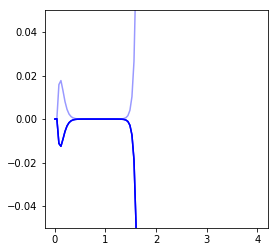

In [214]:
E = -619.6578420992868
fig, ax = plt.subplots(1, figsize=(4, 4))
sol = solve_schr(E)
ax.plot(t, np.real(sol), 'b', label='Re')
ax.plot(t, np.imag(sol), 'b', label='Im')
ax.plot(t, np.absolute(sol), 'b', label='Im', alpha=.4)
ax.set_ylim([-0.05, 0.05])

In [2]:
import sympy
import fenics

In [68]:
# x, E = sympy.symbols('x E')
# psi = sympy.symbols('psi', cls=sympy.Function)
# schr = sympy.Eq(-psi(x).diff(x, x) - Float(1.0)/x * psi(x), E * psi(x))
# sympy.printing.ccode(sympy.simplify(schr))

n_verts = 20
space_r = 0.01
# mesh = fenics.RectangleMesh(fenics.Point(-space_r, -space_r), fenics.Point(space_r, space_r), n_verts, n_verts, diagonal='right')
# mesh = fenics.UnitSquareMesh(n_verts, n_verts)
# mesh = fenics.BoxMesh(fenics.Point(-5, -5, -5), fenics.Point(5, 5, 5), n_verts, n_verts, n_verts)
mesh = fenics.Mesh('circle.mesh')
fspace = fenics.FunctionSpace(mesh, "Lagrange", 1)
# u = fenics.Function(fspace)
# v = fenics.TestFunction(fspace)
# V = fenics.Expression('1.0/sqrt(pow(x[0],2)+pow(x[1],2)+pow(x[2],2))', degree=2)
V = fenics.Expression('1.0/(sqrt(pow(x[0],2)+pow(x[1],2))+1e0)', element=fspace.ufl_element())
# V = fenics.Expression('1/sqrt(pow(x[0],2)+pow(x[1],2))', degree=1)
# zero = fenics.Constant(0.0)
# E = fenics.Constant(-69.24553242341103)

def boundary(x, on_boundary):
    return on_boundary
bc = fenics.DirichletBC(fspace, fenics.Constant(0.0), boundary)
# bc = fenics.DirichletBC(fspace, fenics.Constant(0.0001), boundary)
# bc = fenics.DirichletBC(fspace, fenics.Expression('1.0/(pow(x[0],2)+pow(x[1],2))*0.001', degree=2), boundary)
# bcc = fenics.DirichletBC(fspace, fenics.Constant(1.0), fenics.CompiledSubDomain("near(x[0], 0.0) && abs(x[1]) < 1.1"))

# a = (fenics.dot(-fenics.div(fenics.grad(u)) - V * u - E * u, v)) * fenics.dx
# a = (fenics.dot(-fenics.div(fenics.grad(u)) - V * u, v)) * fenics.dx
# a = fenics.inner((1 + u**2)*fenics.grad(u), fenics.grad(v))*fenics.dx
# L = E*v*fenics.dx
# u = fenics.Function(fspace)
# fenics.solve(a == 0, u, [bcc], solver_parameters={"newton_solver":{"relative_tolerance":1e-6}})
# fenics.plot(u)
# fenics.plot(mesh)

u = fenics.TrialFunction(fspace)
v = fenics.TestFunction(fspace)
# a = fenics.dot(fenics.grad(u), fenics.grad(v))*fenics.dx
a = (fenics.dot(-fenics.div(fenics.grad(u)) - V * u, v)) * fenics.dx
# a = (fenics.dot(-fenics.grad(u), fenics.grad(v)) - fenics.dot(V * u, v)) * fenics.dx
# b = fenics.dot(u, v) * fenics.dx
# m = u * v * fenics.dx

A = fenics.PETScMatrix()
# M = fenics.PETScMatrix()
# _ = fenics.PETScVector()
# L = fenics.Constant(0.) * v * fenics.dx
# bc = fenics.DirichletBC(fspace, fenics.Constant(0.), fenics.DomainBoundary())
# bc.apply(A)
fenics.assemble(a, tensor=A)
# fenics.assemble_system(a, L, bc, A_tensor=A)
# fenics.assemble(m, tensor=M)
# fenics.assemble_system(a, L, bc, A_tensor=A, b_tensor=_)

# dummy = v*fenics.dx
# A = fenics.PETScMatrix()
# fenics.assemble_system(a, dummy, bc, A_tensor=A)
# B = fenics.PETScMatrix()
# fenics.assemble_system(b, dummy, bc, A_tensor=B)

eigensolver = fenics.SLEPcEigenSolver(A)
eigensolver.parameters['spectrum'] = 'smallest real'
eigensolver.parameters['tolerance'] = 1.e-15

eigensolver.parameters["solver"] = "krylov-schur"
eigensolver.parameters["problem_type"] = "gen_hermitian"

eigensolver.solve(8)
r, c, rx, cx = eigensolver.get_eigenpair(0)

print("Largest eigenvalue: ", r)

n_eigs = 8
n_col = 4
fig, ax = plt.subplots(n_eigs // n_col, n_col, figsize=(3*n_eigs, 6*n_eigs // n_col))
for i in np.arange(n_eigs):
  r, c, rx, cx = eigensolver.get_eigenpair(i)
  # Initialize function and assign eigenvector
  u = fenics.Function(fspace)
  u.vector()[:] = rx

  import dolfin
  # Plot eigenfunction
  dolfin.common.plotting.mplot_function(ax[i // n_col, i % n_col], u)
  fenics.plot(mesh)

RuntimeError: 

*** -------------------------------------------------------------------------
*** DOLFIN encountered an error. If you are not able to resolve this issue
*** using the information listed below, you can ask for help at
***
***     fenics-support@googlegroups.com
***
*** Remember to include the error message listed below and, if possible,
*** include a *minimal* running example to reproduce the error.
***
*** -------------------------------------------------------------------------
*** Error:   Unable to open file.
*** Reason:  Unknown file type (".mesh") for file "circle.mesh".
*** Where:   This error was encountered inside File.cpp.
*** Process: 0
*** 
*** DOLFIN version: 2019.1.0
*** Git changeset:  f3de96341c54e434c48115de5a3975b482aee933
*** -------------------------------------------------------------------------


FullArgSpec(args=['object'], varargs='args', varkw='kwargs', defaults=None, kwonlyargs=[], kwonlydefaults=None, annotations={})


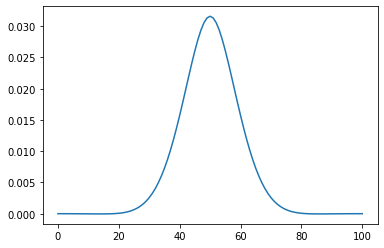

In [53]:
import inspect
print(inspect.getfullargspec(fenics.plot))

# arr = u.compute_vertex_values().reshape((n_verts+1, n_verts+1))
arr = rx[:].reshape((n_verts+1, n_verts+1))
plt.plot(arr[n_verts//2, :])
# plt.imshow(arr)
# dir(rx)
# dir(rx.vec())
# # rx.vec().getValues()
# # rx.vec().getValue(1)
# rx[:]

# dir(A)
# dir(A.mat())
# A.mat()[:,:].shape

In [2]:
"""
Reference
  NuSol — Numerical solver for the 3D stationary nuclear Schrödinger equation, Timo Graen, Helmut Grubmüller, 2015
  http://cpc.cs.qub.ac.uk/summaries/AEXO_v1_0.html
"""

POTENTIAL_CUTOFF = -1000

def DVR_mat_single_d(n_cells, cell_size):
  hbar = 1.0
  # Particle mass
  mass = 1.0
  DVRMatrix = []
  FORTRANoffset = 1
  for i in range(n_cells):
    for idash in range(n_cells):
      if i == idash:
        DVRMatrix.append(   [ FORTRANoffset + i , FORTRANoffset + idash ,  hbar *(-1.0)**np.abs(i-idash) / (2.0*mass*cell_size**2.0) * np.pi**(2.0) / 3.0   , 1.0 ])
      elif i != idash:          
        DVRMatrix.append(   [ FORTRANoffset + i , FORTRANoffset + idash ,  hbar *(-1.0)**np.abs(i-idash) / (2.0*mass*cell_size**2.0) * 2.0/(i-idash)**2.0   , 1.0 ])
  DVRMatrix = np.array(DVRMatrix)
  row   = DVRMatrix[:,0]-1
  col   = DVRMatrix[:,1]-1
  dataA = DVRMatrix[:,2]
  A  = scipy.sparse.coo_matrix((dataA,(row,col)), shape=(n_cells,n_cells))
  return A

def DVR_mat2d(Vf, xmin=-7.5, xmax=7.5, n_cells=100):
  cell_size = (xmax - xmin) / n_cells
  Ax = DVR_mat_single_d(n_cells, cell_size)
  Ay = DVR_mat_single_d(n_cells, cell_size)
  D = scipy.sparse.coo_matrix( 
                        scipy.sparse.kron(  Ax                        , scipy.sparse.eye(n_cells)  )
                      + scipy.sparse.kron(  scipy.sparse.eye(n_cells)   , Ay                       )
                      )    
  x = np.linspace(xmin, xmax, n_cells)
  y = np.linspace(xmin, xmax, n_cells)
  x, y = np.meshgrid(x, y)
  V = scipy.sparse.eye((n_cells)*(n_cells))
  Vtmp = np.array(eval(Vf)).reshape( ((n_cells)*(n_cells)) )
  Vtmp = np.maximum(Vtmp, POTENTIAL_CUTOFF)
  Vtmp -= POTENTIAL_CUTOFF
  V.setdiag(Vtmp)
  V   = scipy.sparse.coo_matrix(V)
  return D + V

def DVR_mat3d(Vf, xmin=-7.5, xmax=7.5, n_cells=100):
  cell_size = (xmax - xmin) / n_cells
  Ax = DVR_mat_single_d(n_cells, cell_size)
  Ay = DVR_mat_single_d(n_cells, cell_size)
  Az = DVR_mat_single_d(n_cells, cell_size)
  D = scipy.sparse.coo_matrix( 
                        scipy.sparse.kron( scipy.sparse.kron(  Ax                        , scipy.sparse.eye(n_cells)  ), scipy.sparse.eye(n_cells))
                      + scipy.sparse.kron( scipy.sparse.kron(  scipy.sparse.eye(n_cells)   , Ay                       ), scipy.sparse.eye(n_cells))
                      + scipy.sparse.kron( scipy.sparse.kron(  scipy.sparse.eye(n_cells)   , scipy.sparse.eye(n_cells)  ), Az                     )
                      )      
  x = np.linspace(xmin, xmax, n_cells)
  y = np.linspace(xmin, xmax, n_cells)
  z = np.linspace(xmin, xmax, n_cells)
  x, y, z = np.meshgrid(x, y, z)
  V = scipy.sparse.eye((n_cells)*(n_cells)*(n_cells))
  Vtmp = np.array(eval(Vf)).reshape( ((n_cells)*(n_cells)*(n_cells)) )
  Vtmp = np.maximum(Vtmp, POTENTIAL_CUTOFF)
  Vtmp -= POTENTIAL_CUTOFF
  V.setdiag(Vtmp)
  V   = scipy.sparse.coo_matrix(V)
  return D + V

In [3]:
t1 = time.time()
xmin = -5.0
xmax = 5.0
nd = 3
n_cells = 21
# A = DVR_mat2d('-1.0 / (np.sqrt(x**2.0 + y**2.0) + 1e-8)', xmin=xmin, xmax=xmax, n_cells=n_cells)
A = DVR_mat3d('-1.0 / (np.sqrt(x**2.0 + y**2.0 + z**2.0) + 1e-8)', xmin=xmin, xmax=xmax, n_cells=n_cells)
# A = DVR_mat2d('0.5 * (x**2.0 + y**2.0)', xmin=xmin, xmax=xmax, n_cells=n_cells)
n_eigs = 20
e_val, e_vec = scipy.sparse.linalg.eigs(A=A, k=n_eigs, which='LM', sigma=0)
e_val += POTENTIAL_CUTOFF
# e_val, e_vec = scipy.sparse.linalg.eigs(A=A, k=n_eigs, which='SM')

with open('eigen.data', 'wb') as f:
  pkl.dump((e_val, e_val), f)
# with open('eigen.data', 'rb') as f:
#   e_val, e_val = pkl.load(f)

print(time.time() - t1)

0.0


In [167]:
from sympy.physics.hydrogen import Psi_nlm, E_nl
from sympy import Symbol, lambdify

r = Symbol("r", real=True, positive=True)
phi = Symbol("phi", real=True)
theta = Symbol("theta", real=True)
Z = Symbol("Z", positive=True, integer=True, nonzero=True)

n_eigs = 12
xmin = -20.0
xmax = 20.0
n_cells = 51
x = np.linspace(xmin, xmax, n_cells)
y = np.linspace(xmin, xmax, n_cells)
z = np.linspace(xmin, xmax, n_cells)
x, y, z = np.meshgrid(x, y, z)
# x = x.astype(np.complex128)
# y = y.astype(np.complex128)
# z = z.astype(np.complex128)
# x.shape
r_val = np.sqrt(x**2 + y**2 + z**2)
# print(np.where(x == 0, 0, np.arctan(y / x)))
psi_es = []
psi_vals = []
teig = 0
tn = 1
tl = 0
tm = 0
while teig < n_eigs:
  psi = Psi_nlm(tn, tl, tm, r, phi, theta, Z)
#   print(psi)
  psi_f = lambdify((r, phi, theta, Z), psi, 'numpy')
#   print(psi_f(2, 0.0, np.pi / 2.0, 1.0), psi_f(2, 0.3, np.pi / 2.0, 1.0), psi_f(2, 0.7, np.pi / 2.0, 1.0))
  psi_val = psi_f(
    r_val, 
    np.arctan2(y, x), 
    np.where(r_val == 0, np.pi / 2.0, np.arccos(z / r_val)), 
    1.0 * np.ones(x.shape)
  )
  psi_es.append(E_nl(tn, Z=1.0))
  psi_vals.append(psi_val)
  print(tn, tl, tm)
  if tm < tl:
    tm += 1
  elif tl < tn - 1:
    tl += 1
    tm = -tl
  else:
    tn += 1
    tl = 0
    tm = 0
  teig += 1
# psi_val = np.array(psi.evalf(subs={
#   r: r_val,
#   phi: np.where(x == 0, 0, np.arctan(y / x)),
#   theta: np.where(r_val == 0, np.pi / 2.0, np.arccos(z / r_val)),
#   Z: 1.0 * np.ones(x.shape),
# }))
# .reshape( ((n_cells)*(n_cells)*(n_cells)) )
# print(psi_val)

e_val = np.array(psi_es)
e_vec = np.array(psi_vals)

Z**(3/2)*exp(-Z*r)/sqrt(pi)
0.07635475708858216 0.07635475708858216 0.07635475708858216
1 0 0
sqrt(2)*Z**(3/2)*(-Z*r + 2)*exp(-Z*r/2)/(8*sqrt(pi))
0.0 0.0 0.0
2 0 0
Z**(5/2)*r*exp(-I*phi)*exp(-Z*r/2)*sin(theta)/(8*sqrt(pi))
(0.05188843717757434+0j) (0.04957091739943843-0.015334081678050704j) (0.03968646578566973-0.033427448992915165j)
2 1 -1
sqrt(2)*Z**(5/2)*r*exp(-Z*r/2)*cos(theta)/(8*sqrt(pi))
4.493310642251543e-18 4.493310642251543e-18 4.493310642251543e-18
2 1 0
-Z**(5/2)*r*exp(I*phi)*exp(-Z*r/2)*sin(theta)/(8*sqrt(pi))
(-0.05188843717757434+0j) (-0.04957091739943843-0.015334081678050704j) (-0.03968646578566973-0.033427448992915165j)
2 1 1
sqrt(3)*Z**(3/2)*(2*Z**2*r**2/9 - 2*Z*r + 3)*exp(-Z*r/3)/(27*sqrt(pi))
-0.0020646657943480247 -0.0020646657943480247 -0.0020646657943480247
3 0 0
Z**(5/2)*r*(-2*Z*r/3 + 4)*exp(-I*phi)*exp(-Z*r/3)*sin(theta)/(54*sqrt(pi))
(0.02860884845168266+0j) (0.02733107683775704-0.008454492806784203j) (0.02188125422547542-0.018430326184076598j)
3 1 -1
sqrt(2)

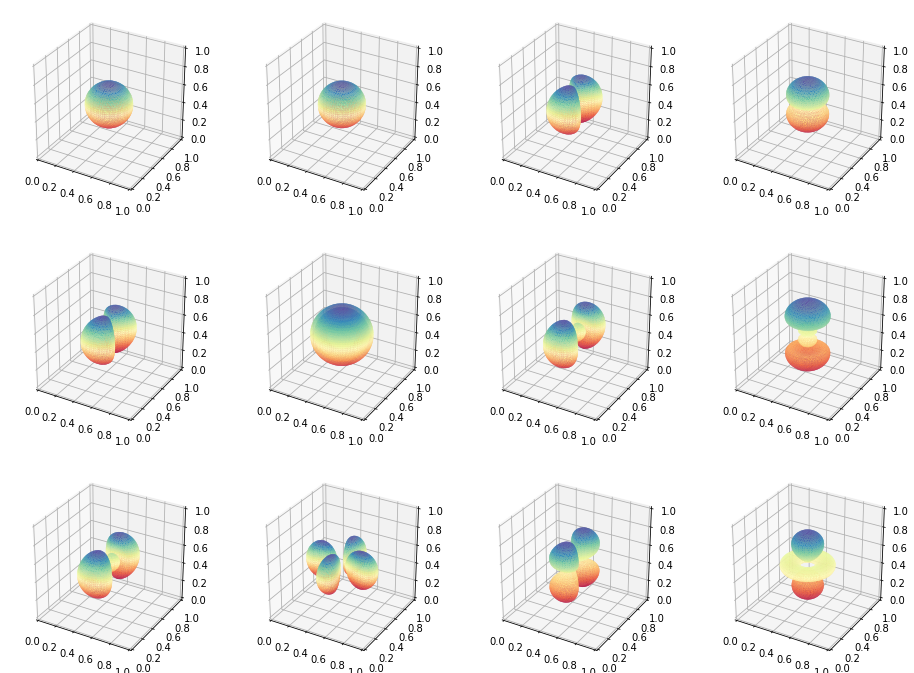

In [198]:
def plot_isosurface(ax, vol, cutoff=None):
  if cutoff is None:
    cutoff = np.percentile(vol, 95)
  verts, faces, _, _ = measure.marching_cubes_lewiner(vol, cutoff, spacing=np.array([1.0, 1.0, 1.0]) / n_cells)
  ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
                cmap='Spectral', lw=1, alpha=1.0)
  ax.set_xlim(0, 1)
  ax.set_ylim(0, 1)
  ax.set_zlim(0, 1)


# psis = e_vec.T.reshape((n_eigs, n_cells, n_cells))
# psis = e_vec.T.reshape((n_eigs, n_cells, n_cells, n_cells))
psis = e_vec.reshape((n_eigs, n_cells, n_cells, n_cells))
x = np.linspace(xmin, xmax, n_cells)
y = np.linspace(xmin, xmax, n_cells)
XX, YY = np.meshgrid(x,y)
per_row = 4
fig, ax = plt.subplots(n_eigs // per_row, per_row, figsize=(4*per_row, 4*(n_eigs // per_row)),
                      subplot_kw={'projection': '3d'}
)
for i, j in enumerate(np.argsort(e_val)[::1]):
#   vol = np.real(np.conj(psis[j]) * psis[j])
  vol = np.real(np.square(psis[j]))
  # np.max(vol) * 0.1
#   print(np.max(vol))
  plot_isosurface(ax[i // per_row, i % per_row], np.real(np.square(psis[j])))
#   verts, faces, _, _ = measure.marching_cubes_lewiner(vol, np.percentile(vol, 95), spacing=np.array([1.0, 1.0, 1.0]) / n_cells)
#   ax[i // per_row, i % per_row].plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
#                 cmap='Spectral', lw=1, alpha=1.0)
#   ax[i // per_row, i % per_row].set_xlim(0, 1)
#   ax[i // per_row, i % per_row].set_ylim(0, 1)
#   ax[i // per_row, i % per_row].set_zlim(0, 1)
#   mesh = Poly3DCollection(verts[faces])
#   mesh.set_edgecolor('k')
#   ax[i // per_row, i % per_row].add_collection3d(mesh)
#   ax[i // per_row, i % per_row].pcolor(XX, YY, np.real(np.conj(psis[j]) * psis[j]))
#   ax[i // per_row, i % per_row].pcolor(XX, YY, np.sum(np.real(np.conj(psis[j]) * psis[j]), axis=-1))
#   ax[i // per_row, i % per_row].pcolor(XX, YY, np.real(psis[j]))

[ 0  1  2  3  4  5  6  7  8  9 10 11]


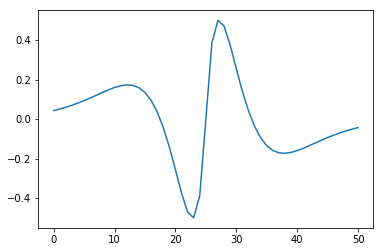

In [179]:
print(e_val[np.argsort(e_val)[::1]])
# A.shape
idx = np.argsort(e_val)[7]
# plt.plot(np.real(np.square(psis[idx]))[n_cells//2, n_cells//2])
plt.plot(np.real(psis[idx])[n_cells//2, n_cells//2])

In [2]:
import tensorflow as tf

sess = tf.InteractiveSession()

C:\Users\ghost\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ghost\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ghost\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ghost\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

(51, 51, 51, 16, 3)
(51, 51, 51, 16)
0.4829269734332419
4.764531018299747e-05
[[[[0.25429712 0.33151832 0.33975812 0.81000608 0.68191133 1.53628023
    0.17310568 0.13827362 0.21176893 0.32504941 0.0566744  0.17885984
    0.24575181 0.19952361 0.18082575 1.31733188]]]] [[[[ 6.99076075e-02  2.18326690e+00  7.62609190e-02 -7.65575069e-04
    -8.75738944e-02  5.28257697e-02 -1.37937996e+00 -4.06587530e-02
     4.71853062e-03 -2.26983571e+00  1.89899036e-02  1.46767663e+00
    -1.92744279e-02 -2.51665603e-03  5.38419679e-02 -2.15117184e-01]]]] [[[[[ -5.47373571  -5.32283174   4.70194324]
    [  0.02508653   2.79746811  -0.04469741]
    [ -4.37204861  -9.66981174  -2.72933638]
    [  3.00281943   5.238682   -17.78685662]
    [  0.73829069 -21.72929263  -7.12598463]
    [ 10.22722235  -4.36343758   5.15429488]
    [  0.05159449   3.63789144  -0.14199867]
    [  2.41866097   5.93368864   7.46370077]
    [  9.99421284  -2.11491608  15.27173138]
    [  0.22191106  -2.79050987   0.05377759]
    

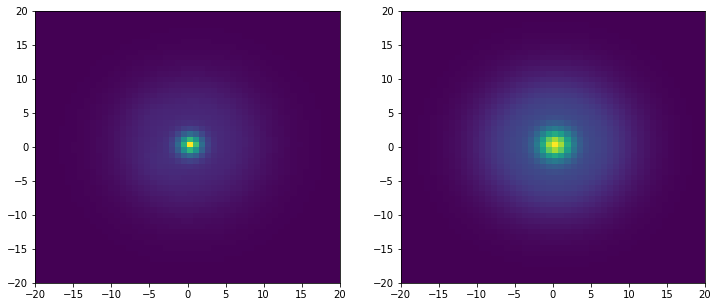

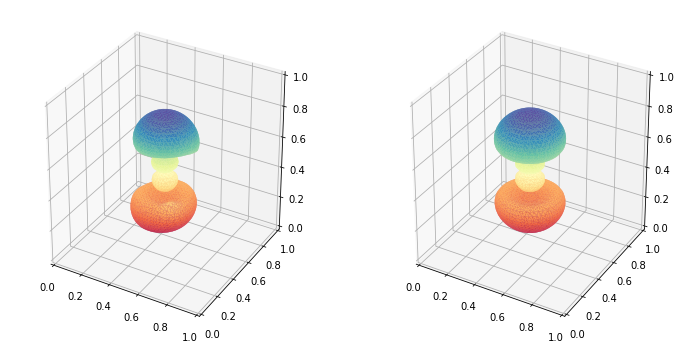

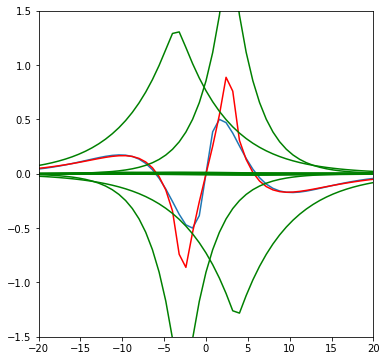

In [200]:
tf.reset_default_graph()
sess.close()
config = tf.ConfigProto(
#   device_count = {'GPU': 0}
)
sess = tf.InteractiveSession(config=config)

# x = np.linspace(xmin, xmax, n_cells)
x = np.array(np.meshgrid(*[np.linspace(xmin, xmax, n_cells) for _ in range(nd)])).T
# fval = np.real(psis[idx])[n_cells//2]
fval = np.real(psis[idx])
fval /= (np.max(fval) - np.min(fval))
n_g = 16

in_x = tf.placeholder(tf.float64, shape=[n_cells] * nd + [nd], name='x')
in_y = tf.placeholder(tf.float64, shape=[n_cells] * nd, name='y')
g_a = tf.Variable(np.abs(np.random.randn(*([1] * nd), n_g)) + 1e-4, trainable=True)
g_b = tf.Variable(np.random.randn(*([1] * nd), n_g), trainable=True)
g_c = tf.Variable(np.random.randn(*([1] * nd), n_g, nd) * 10.0, trainable=True)
tile_shape = [n_cells] * nd + [1]
print(tf.square(tf.tile(g_c, tile_shape + [1]) - tf.expand_dims(in_x, axis=-2)).shape)
fpred = tf.tile(g_b, tile_shape) * \
          tf.exp(
            -tf.tile(g_a, tile_shape) * \
            tf.sqrt(tf.reduce_sum(tf.square(tf.tile(g_c, tile_shape + [1]) - tf.expand_dims(in_x, axis=-2)), axis=-1))
          )
print(fpred.shape)
loss = tf.reduce_mean(tf.square(tf.reduce_sum(fpred, axis=-1) - in_y))
loss += tf.reduce_mean(tf.square(g_b)) * 1e-6

optimizer = tf.train.AdamOptimizer(1e-2)
train_step = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

fpred_history = []
steps = 4000
for step in range(steps):
  _, tloss, ty, a_, b_, c_ = sess.run([train_step, loss, fpred, g_a, g_b, g_c], feed_dict={in_x: x, in_y: fval})
  if step % 50 == 0:
    fpred_history.append(ty)
  if step == 1:
    print(tloss)
print(np.mean(tloss))
print(a_, b_, c_)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# ax[0].plot(x[n_cells//2, n_cells//2, :, 1], fval[n_cells//2, n_cells//2])
# plt.plot(x, gfunc(x, *popt), 'r-')
# ax[0].plot(x[n_cells//2, n_cells//2, :, 1], np.sum(ty[n_cells//2, n_cells//2], axis=1), 'r-')

ax[0].pcolor(XX, YY, np.sum(np.square(np.sum(ty, axis=-1)), axis=-1))
ax[1].pcolor(XX, YY, np.sum(np.square(fval), axis=-1))

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                      subplot_kw={'projection': '3d'}
)
vol_cutoff = np.percentile(np.square(fval), 95)
plot_isosurface(ax[0], np.square(np.sum(ty, axis=-1)), vol_cutoff)
# vol = np.square(np.sum(ty, axis=-1))
# verts, faces, _, _ = measure.marching_cubes_lewiner(vol, vol_cutoff, spacing=np.array([1.0, 1.0, 1.0]) / n_cells)
# ax[0].plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
#               cmap='Spectral', lw=1, alpha=1.0)
# ax[0].set_xlim(0, 1)
# ax[0].set_ylim(0, 1)
# ax[0].set_zlim(0, 1)


plot_isosurface(ax[1], np.square(fval), vol_cutoff)
vol = np.square(fval)
# verts, faces, _, _ = measure.marching_cubes_lewiner(vol, vol_cutoff, spacing=np.array([1.0, 1.0, 1.0]) / n_cells)
# ax[1].plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
#               cmap='Spectral', lw=1, alpha=1.0)
# ax[1].set_xlim(0, 1)
# ax[1].set_ylim(0, 1)
# ax[1].set_zlim(0, 1)


fig, ax = plt.subplots(1, figsize=(6, 6))
line1, = ax.plot([], [])
line2, = ax.plot([], [], 'r-')
lines_g = [ax.plot([], [], 'g-')[0] for i in range(n_g)]
ax.set_xlim((xmin, xmax))
ax.set_ylim((-1.50, 1.5))
# ax[1].set_xlim((xmin, xmax))
# ax[1].set_ylim((-0.15, 0.05))
def init():
  line1.set_data(x[n_cells//2, n_cells//2, :, 1], fval[n_cells//2, n_cells//2])
  line2.set_data([], [])
  for j in range(n_g):
    lines_g[j].set_data([], [])
  return tuple([line1,line2] + lines_g)
def animate(i):
  line2.set_data(x[n_cells//2, n_cells//2, :, 1], np.sum(fpred_history[i][n_cells//2, n_cells//2], axis=1))
  for j in range(n_g):
    lines_g[j].set_data(x[n_cells//2, n_cells//2, :, 1], fpred_history[i][n_cells//2, n_cells//2][:, j])
  return tuple([line1,line2] + lines_g)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(fpred_history), interval=50, blit=True)
HTML(anim.to_jshtml())

In [22]:
from sympy import symbols, Symbol, integrate, exp, oo
from sympy.printing.tensorflow import TensorflowPrinter
x, b1, c1, b2, c2, b3, c3 = symbols('x b1 c1 b2 c2 b3 c2')
a1, a2, a3 = symbols('a1 a2 a3', positive=True)
V = integrate(1.0 / (b1*exp(-a1*(x-c1)**2) * b3*exp(-a3*(x-c3)**2)) * b2*exp(-a2*(x-c2)**2), (x, -oo, oo))
# V = integrate(x**2*b1*exp(-a1*(x-c1)**2), (x, -oo, oo))
# V = integrate(exp(-a1*(x-c1)**2), (x, -oo, oo))
# Vf = lambdify((a1, b1, c1), V, 'tensorflow')
# Vf??
# TensorflowPrinter().doprint(V).replace('sqrt', 'tf.sqrt').replace('tensorflow', 'tf')
V
# sympy.printing.tensorflow.__file__
# TensorflowPrinter().doprint(V)

Piecewise((-1.0*I*sqrt(pi)*a1*b2*c1*(1 - a2*c2/(a1*c1))*(2 - erfc(I*a1*c1*(1 - a2*c2/(a1*c1))*(1 + a3*c2/(a1*c1*(1 - a2*c2/(a1*c1))))/(sqrt(polar_lift(a1 - a2))*sqrt(polar_lift(a3/polar_lift(a1 - a2) + 1)))))*exp(-a1**2*c1**2*(1 - a2*c2/(a1*c1))**2*(1 + a3*c2/(a1*c1*(1 - a2*c2/(a1*c1))))**2/((a1 - a2)*(a3/(a1 - a2) + 1)))*exp(a1*c1**2 - a2*c2**2 + a3*c2**2)*sqrt(polar_lift(a1 - a2))/(b1*b3*(a1 - a2)*(2*a1*c1 - 2*a2*c2)*sqrt(polar_lift(a3/polar_lift(a1 - a2) + 1))) + 1.0*I*sqrt(pi)*a2*b2*c2*(2 - erfc(I*a2*c2*(1 - a3/(a2*(-a1*c1/(a2*c2) + 1)))*(-a1*c1/(a2*c2) + 1)/(sqrt(polar_lift(a1 - a2))*sqrt(polar_lift(a3/polar_lift(a1 - a2) + 1)))))*(-a1*c1/(a2*c2) + 1)*exp(-a2**2*c2**2*(1 - a3/(a2*(-a1*c1/(a2*c2) + 1)))**2*(-a1*c1/(a2*c2) + 1)**2/((a1 - a2)*(a3/(a1 - a2) + 1)))*exp(a1*c1**2 - a2*c2**2 + a3*c2**2)*sqrt(polar_lift(a1 - a2))/(b1*b3*(a1 - a2)*(2*a1*c1 - 2*a2*c2)*sqrt(polar_lift(a3/polar_lift(a1 - a2) + 1))), ((Abs(arg(a1 - a2) + arg(a3/polar_lift(a1 - a2) + 1) + pi) < pi/2) | ((Abs(arg

In [196]:
mol = [
  {'name': 'O', 'pos': [0.0, 0.0, 0.0]},
  {'name': 'H', 'pos': [0.2774, 0.8929, 0.2544]},
  {'name': 'H', 'pos': [0.6068, -0.2383, -0.7169]},
]

import mendeleev
for atom in mol:
  el = mendeleev.element(atom['name'])
  econf = mendeleev.econf.ElectronicConfiguration(el.econf)
  print(econf.conf.items())
  

tf.reset_default_graph()
sess.close()
config = tf.ConfigProto(
  device_count = {'GPU': 0}
)
sess = tf.InteractiveSession(config=config)

R = np.zeros(1, n_d)
# x = np.linspace(xmin, xmax, n_cells)
x = np.array(np.meshgrid(*[np.linspace(xmin, xmax, n_cells) for _ in range(nd)])).T
# fval = np.real(psis[idx])[n_cells//2]
fval = np.real(psis[idx])
fval /= (np.max(fval) - np.min(fval))
n_g = 4

# in_x = tf.placeholder(tf.float64, shape=[n_cells] * nd + [nd], name='x')
# in_y = tf.placeholder(tf.float64, shape=[n_cells] * nd, name='y')
Rg_a = tf.Variable(np.abs(np.random.randn(1, nd, n_g)) * 1e-4 + 1e-4, trainable=False)
Rg_b = tf.Variable(np.random.randn(1, nd, n_g), trainable=False)
Rg_c = tf.Variable(R, trainable=False)
rg_a = tf.Variable(np.abs(np.random.randn(1, nd, n_g)) + 1e-4, trainable=True)
rg_b = tf.Variable(np.random.randn(1, nd, n_g), trainable=True)
rg_c = tf.Variable(np.random.randn(1, nd, n_g) * np.std(R) + R, trainable=True)

# Electron momentum
# rp = 

# Electron-nucleus attraction
rR = - tf.exp(rg_a * tf.abs(g_c))

print(tf.square(tf.tile(g_c, tile_shape + [1]) - tf.expand_dims(in_x, axis=-2)).shape)
fpred = tf.tile(g_b, tile_shape) * \
          tf.exp(
            -tf.tile(g_a, tile_shape) * \
            tf.sqrt(tf.reduce_sum(tf.square(tf.tile(g_c, tile_shape + [1]) - tf.expand_dims(in_x, axis=-2)), axis=-1))
          )
print(fpred.shape)
loss = tf.reduce_mean(tf.square(tf.reduce_sum(fpred, axis=-1) - in_y))
loss += tf.reduce_mean(tf.square(g_b)) * 1e-6

optimizer = tf.train.AdamOptimizer(1e-2)
train_step = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

odict_items([((1, 's'), 2), ((2, 's'), 2), ((2, 'p'), 4)])
odict_items([((1, 's'), 1)])
odict_items([((1, 's'), 1)])


In [ ]:
def gauss_product(a1, b1, c1, a2, b2, c2):
  # The product of two Gaussians gives another Gaussian (pp411)
  # Pass in the exponent and centre as a tuple

  a, Ra = gauss_A
  b, Rb = gauss_B
  p = a + b
  diff = np.linalg.norm(c1 - c2, axis=-1)**2             # squared difference of the two centres
  N = (4*a1*a2/(np.pi**2))**0.75                   # Normalisation
  K = N*np.exp(-a1*a2/p*diff)                      # New prefactor
  Rp = (a1*c1 + a2*c2)/p                        # New centre

  return p, diff, K, Rp

[-0.2        -0.22222222 -0.25       -0.28571428 -0.33333333 -0.4
 -0.5        -0.66666666 -0.99999999 -1.99999996 -5.         -1.99999996
 -0.99999999 -0.66666666 -0.5        -0.4        -0.33333333 -0.28571428
 -0.25       -0.22222222 -0.2       ]


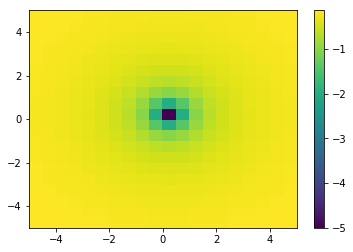

In [30]:
x = np.linspace(xmin, xmax, n_cells)
y = np.linspace(xmin, xmax, n_cells)
x, y = np.meshgrid(x, y)
# V = scipy.sparse.eye((n_cells)*(n_cells))
V = np.array(eval('-1.0 / (np.sqrt(x**2.0 + y**2.0) + 1e-8)')).reshape( (n_cells, n_cells) )
V = np.maximum(V, -5)
# V -= np.min(V)
# V = np.array(eval('0.5 * (x**2.0 + y**2.0)')).reshape( (n_cells, n_cells) )
plt.pcolor(XX, YY, V)
plt.colorbar()
print(V[n_cells // 2])

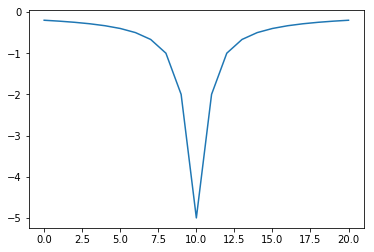

In [31]:
plt.plot(V[n_cells//2])

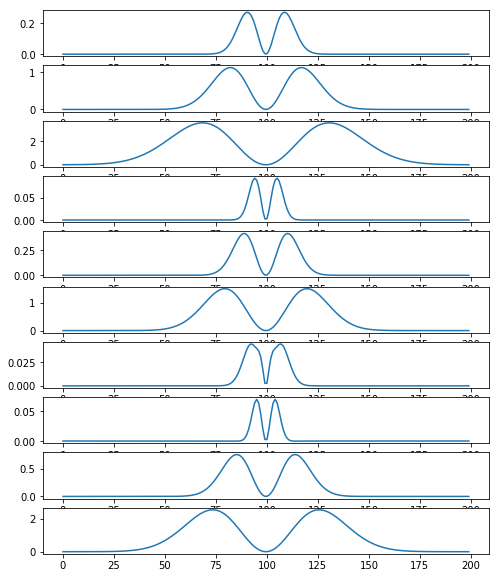

In [37]:
gtos = [
  {
    "exponents": [
                        "33.86500",
                        "5.094790",
                        "1.158790"
                    ],
                    "coefficients": [
                        [
                            "0.0254938",
                            "0.190373",
                            "0.852161"
                        ]
                    ]
  },
  {
    "exponents": [
                        "0.325840"
                    ],
                    "coefficients": [
                        [
                            "1.000000"
                        ]
                    ]
  },
  {
    "exponents": [
                        "0.102741"
                    ],
                    "coefficients": [
                        [
                            "1.000000"
                        ]
                    ]
  },
  {
    "exponents": [
                        "98.12430",
                        "14.76890",
                        "3.318830"
                    ],
                    "coefficients": [
                        [
                            "0.0287452",
                            "0.208061",
                            "0.837635"
                        ]
                    ]
  },
  {
    "exponents": [
                        "0.874047"
                    ],
                    "coefficients": [
                        [
                            "1.000000"
                        ]
                    ]
  },
  {
    "exponents": [
                        "0.244564"
                    ],
                    "coefficients": [
                        [
                            "1.000000"
                        ]
                    ]
  },
  {
    "exponents": [
        "4563.240",
        "682.0240",
        "154.9730",
        "44.45530",
        "13.02900",
        "1.827730"
    ],
    "coefficients": [
        [
            "0.00196665",
            "0.0152306",
            "0.0761269",
            "0.2608010",
            "0.6164620",
            "0.2210060"
        ]
    ]
  },
  {
    "exponents": [
                        "20.96420",
                        "4.803310",
                        "1.459330"
                    ],
                    "coefficients": [
                        [
                            "0.114660",
                            "0.919999",
                            "-0.00303068"
                        ],
                        [
                            "0.0402487",
                            "0.237594",
                            "0.815854"
                        ]
                    ]
  },
  {
    "exponents": [
                        "0.4834560"
                    ],
                    "coefficients": [
                        [
                            "1.000000"
                        ],
                        [
                            "1.000000"
                        ]
                    ]
  },
  {
    "exponents": [
                        "0.1455850"
                    ],
                    "coefficients": [
                        [
                            "1.000000"
                        ],
                        [
                            "1.000000"
                        ]
                    ]
  }
]
x = np.linspace(-10.0, 10.0, 200)
g = lambda a, b, x: b * x**2 * np.exp(-a * x**2)
fig, ax = plt.subplots(len(gtos), figsize=(8, 10))
for i, gto in enumerate(gtos):
  ax[i].plot(np.sum([g(float(a), float(b), x) for a, b in zip(gto['exponents'], gto['coefficients'][0])], axis=0))